1. 임계값 처리
2. 이미지 처리 - 흑백, 지정범위색상 추출, 가장자리, 크기조정, 이미지 히스토그램 시각화
3. 이미지 처리 - 감마처리, 평행이동, 회전
4. 이미지 처리 - 회선 방법
5. 특징 픽셀  - ORB 특징 픽셀 추출, 매칭, 거리계산

4. 이미지 처리 
    - 회선방법(이미지 Filtering)
        샤프닝(Sharpening) 또는 크리스프닝(Crispening) : 영상 내의 엣지 부분을 강조하여 영상을 더욱 선명한 느낌으로 만들어주는 영상 처리 기법

    - 주변의 정보를 사용하여 자신의 화소 값을 업데이트하는 것으로 필터가 이미지의 각 픽셀을 순회하면서 해당 픽셀 주위의 픽셀들와 곱해져 더해진다.
      
    - 필터 후 (화소 값) × (필터) 로 연산한다.
    
    - 필터의 종류
        - 하이 패스 필터 :　방향에 관계없이 에지를 추출
　
        - 그라디언트 필터 : 1 차 미분 필터로 1 방향의 에지 추출. 커널을 회전시키는 것으로, 상하 방향, 좌우 방향의 어느 방향의 에지를 추출 할 것인지를 지정할 수 있다.
　
        - 라플라시안 필터 : 2 차 미분 필터로 평면의 모든 방향의 에지 추출
　
        - 가우시안 필터 : 노이즈 제거에 사용
        
    - filter2D(src(입력대상), dst(출력대상), ddepth(출력이미지 깊이), kernel(회선커널)
            회선커널 : height와 weight를 설정하여 해당 구역의 평균


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x219fa9e5cd0>)

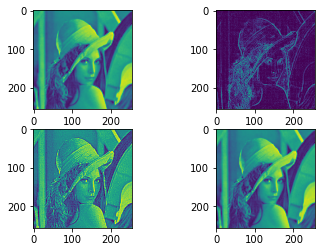

In [32]:
# 1) 주변 정보에서 회소 값을 계산하고 노이즈를 계산한다
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((3,3)) / 9.0  # 회선에 사용하는 필터
print(kernel)
img = cv2.imread('myImg\\Lenna.png', 0)
# img = cv2.imread('myImg\\letters.jpg', 0)
img_kel = cv2.filter2D(img, -1, kernel)
# 인수 '-1'은 원본 이미지(img)를 돌려주는 것을 의미

# 라플라시안 필터 (3*3)
kernel_laplacian_3x3 = np.array([[1,1,1],
                               [1,-8,1],
                               [1,1,1]], np.float32)

kernel_laplacian = cv2.filter2D(img, -1, kernel_laplacian_3x3)

kernel_laplacian_3x3_02 = np.array([[-1,-1,-1],
                                   [-1,9,-1],
                                   [-1,-1,-1]], np.float32)

kernel_laplacian02 = cv2.filter2D(img, -1, kernel_laplacian_3x3_02)

# 가우시안 필터
kernel_gaussian = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]], np.float32) / 16
img_kel_gaussian = cv2.filter2D(img, -1, kernel_gaussian)

# # 이미지 보기
# cv2.imshow('img_kel', img_kel)
# cv2.imshow('kernel_laplacian', kernel_laplacian)
# cv2.imshow('kernel_laplacian02', kernel_laplacian02)
# cv2.imshow('img_kel_gaussian', img_kel_gaussian)

# # 종료
# cv2.waitKey(0)  # 무한기다림
# cv2.destroyAllWindows()

plt.subplot(221), plt.imshow(img_kel)
plt.subplot(222), plt.imshow(kernel_laplacian)
plt.subplot(223), plt.imshow(kernel_laplacian02)
plt.subplot(224), plt.imshow(img_kel_gaussian)

필터처리과정 영상내에서 점으로 마스크 움직임으로 이루어지고 감지한다.

주파수에서 신호처리를 하기 위해서 푸리에 변환에 근원을 가진다

영상의 화소에 직접적으로 수행되는 필터처리를 구현해야 하면 공간필터라는 용어를 사용한다

평활화 공간 여파기 - 히스토그램 평활화 / 평활화 필터 
    -> 영상을 흐리게 해서 잡음을 감소 시킨다.
  1. 평균처리 필터 : 마스크 필터 내의 명암도(값)의 평균으로 명암값을 대처한다. 3x3 = 9/1, 5x5 = 25/1
  2. 가우시안 필터 : 유클리드안 거리를 해결하기 위해 사용
  3. 통계 필터 : 중간값 필터, median라고 알려진다(비선형 랜덤 잡음)
                  이미지_사진의 잡음
    
몽롱화 현상 : 세밀한 부분을 제거하거나 곡선의 잡음 틈들을 연결하는 효과를 지닌다.

(<AxesSubplot:title={'center':'Blurred'}>,
 Text(0.5, 1.0, 'Blurred'))

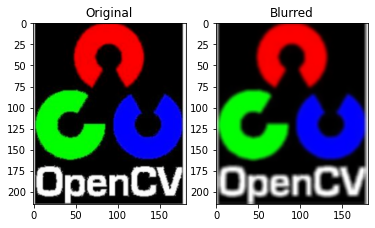

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('myImg\\opencv_logo.png')
blur = cv2.blur(img, (5,5))   # cv2.blur() 또는 cv2.boxFilter() 평균 필터

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')

(<AxesSubplot:title={'center':'Gaussian'}>,
 Text(0.5, 1.0, 'Gaussian'))

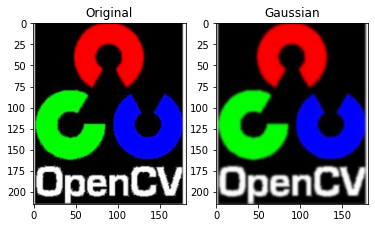

In [30]:
# cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
# sigmaX : 행방향
# sigmaY : 열방향  가우스 표준 편차값
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('myImg\\opencv_logo.png')
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(blur), plt.title('Gaussian')

(<AxesSubplot:title={'center':'median'}>,
 Text(0.5, 1.0, 'median'))

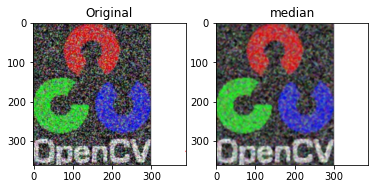

In [29]:
# cv2.medianBlur(src, ksize[, dst]) -> dst
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('myImg\\opencv_logo.png')
img = cv2.imread('myImg\\image.png')
# img = cv2.imread('myImg\\erode.png')
blur = cv2.medianBlur(img, 5)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(blur), plt.title('median')

(<AxesSubplot:title={'center':'bilateralFilter'}>,
 Text(0.5, 1.0, 'bilateralFilter'))

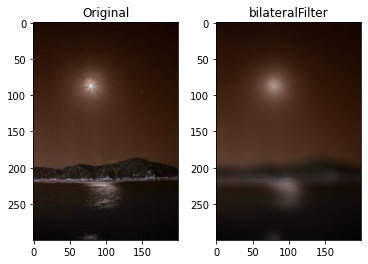

In [33]:
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# 비선형 필터를 구현할 때 사용, 밝기변화가 심한 부분은 남겨두고 휘도변화만 원만하게 만들어 준다
# d : 현재픽셀의 이웃한 픽셀의 지름 정의
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('myImg\\opencv_logo.png')
# img = cv2.imread('myImg\\image.png')
img = cv2.imread('myImg\\day01.jpg')
bilateralFilter = cv2.bilateralFilter(img, 20, 250, 100)

# subplot 1*2 1번째
# subplot 1*2 2번째
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(bilateralFilter), plt.title('bilateralFilter')

(<AxesSubplot:title={'center':'erosion'}>,
 Text(0.5, 1.0, 'erosion'))

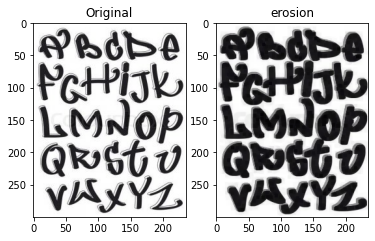

In [34]:
# 4. 이미지 처리 : 이미지 팽창, 수축
# cv2.erode() -> cv2.dilate()
# 싱크대 조리기구 걸려있다 -> 카테고리..
# cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst

# 수축
import cv2
import numpy as np

img = cv2.imread('myImg\\letters.jpg')

# 5*5
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(erosion), plt.title('erosion')


(<AxesSubplot:title={'center':'dilate'}>,
 Text(0.5, 1.0, 'dilate'))

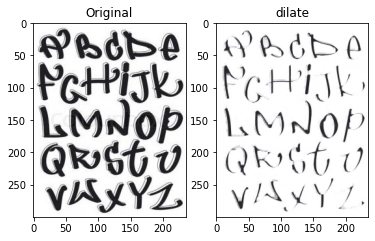

In [35]:
# 4. 이미지 처리 : 이미지 팽창, 수축
# cv2.erode() -> cv2.dilate()
# 싱크대 조리기구 걸려있다 -> 카테고리..
# cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst

# 팽창
import cv2
import numpy as np

img = cv2.imread('myImg\\letters.jpg')

# 5*5
kernel = np.ones((5,5), np.uint8)
dilate = cv2.dilate(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dilate), plt.title('dilate')

(<AxesSubplot:title={'center':'img_res'}>,
 Text(0.5, 1.0, 'img_res'))

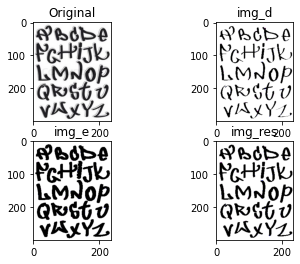

In [36]:
# cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
'''
cv2.MORPH_CLOSE : 팽창한 다음 수축
cv2.MORPH_OPEN : 수축한 다음 팽창
cv2.MORPH_BLACKHAT : 입력한 이미지와 처리된 이미지의 차이를 표시
cv2.MORPH_GRADIENT : 외곽선
'''

# 팽창
import cv2
import numpy as np

img = cv2.imread('myImg\\letters.jpg')
ret,img_th = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), dtype=np.uint8)
img_d = cv2.dilate(img_th, kernel)
img_e = cv2.erode(img_th, kernel)

img_res = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, kernel)

plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.subplot(222),plt.imshow(img_d),plt.title('img_d')
plt.subplot(223),plt.imshow(img_e),plt.title('img_e')
plt.subplot(224),plt.imshow(img_res),plt.title('img_res')

In [50]:
# cv2.getStructuringElement(shape, ksize[, anchor]) -> retval
print(cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
print("====================================================")
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
print("====================================================")
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
# 5. 특징 픽셀  - ORB 특징 픽셀 추출, 매칭, 거리계산
import cv2

cap = cv2.VideoCapture("myImg\\01_People.avi")

while(True):    
    bw, img = cap.read()
#     print(bw)
    orb = cv2.ORB_create()
    
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)
    img2 = cv2.drawKeypoints(img, kp, None, color=(0,0,255), flags=0)
    cv2.imshow("ORB-SLAM", img2)
    
    if cv2.waitKey(1)==13:
        break
        
cap.release()
cv2.destroyAllWindows()